# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ALGO1-:-Introduction-à-l'algorithmique" data-toc-modified-id="ALGO1-:-Introduction-à-l'algorithmique-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://perso.crans.org/besson/teach/info1_algo1_2019/" target="_blank">ALGO1 : Introduction à l'algorithmique</a></a></div><div class="lev1 toc-item"><a href="#Cours-Magistral-1" data-toc-modified-id="Cours-Magistral-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cours Magistral 1</a></div><div class="lev2 toc-item"><a href="#Listes-simplement-chaînées" data-toc-modified-id="Listes-simplement-chaînées-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Listes simplement chaînées</a></div><div class="lev3 toc-item"><a href="#pop/push-pour-une-structure-de-file-(FILO)" data-toc-modified-id="pop/push-pour-une-structure-de-file-(FILO)-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><code>pop</code>/<code>push</code> pour une structure de file (FILO)</a></div><div class="lev3 toc-item"><a href="#add/remove-pour-une-structure-de-pile-(FIFO)" data-toc-modified-id="add/remove-pour-une-structure-de-pile-(FIFO)-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span><code>add</code>/<code>remove</code> pour une structure de pile (FIFO)</a></div><div class="lev2 toc-item"><a href="#Listes-doublement-chaînées" data-toc-modified-id="Listes-doublement-chaînées-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Listes doublement chaînées</a></div><div class="lev3 toc-item"><a href="#Exemple" data-toc-modified-id="Exemple-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Exemple</a></div><div class="lev2 toc-item"><a href="#Implémenter-une-file-d'attente-avec-deux-piles" data-toc-modified-id="Implémenter-une-file-d'attente-avec-deux-piles-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Implémenter une file d'attente avec deux piles</a></div><div class="lev2 toc-item"><a href="#File-de-priorité-:-implémentation-naïve" data-toc-modified-id="File-de-priorité-:-implémentation-naïve-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>File de priorité : implémentation naïve</a></div><div class="lev2 toc-item"><a href="#Implémentation-d'un-tas-binaire" data-toc-modified-id="Implémentation-d'un-tas-binaire-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Implémentation d'un tas binaire</a></div><div class="lev3 toc-item"><a href="#Naïve-:-tableau-trié-!" data-toc-modified-id="Naïve-:-tableau-trié-!-251"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Naïve : tableau trié !</a></div><div class="lev3 toc-item"><a href="#Intelligente-:-tas-binaire-min-équilibré" data-toc-modified-id="Intelligente-:-tas-binaire-min-équilibré-252"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Intelligente : tas binaire min équilibré</a></div><div class="lev2 toc-item"><a href="#Tri-par-tas" data-toc-modified-id="Tri-par-tas-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Tri par tas</a></div><div class="lev3 toc-item"><a href="#Remarques" data-toc-modified-id="Remarques-261"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Remarques</a></div><div class="lev3 toc-item"><a href="#Tri-par-tas" data-toc-modified-id="Tri-par-tas-262"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Tri par tas</a></div><div class="lev2 toc-item"><a href="#Test-numérique-de-l'efficacité-du-tri-par-tas" data-toc-modified-id="Test-numérique-de-l'efficacité-du-tri-par-tas-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Test numérique de l'efficacité du tri par tas</a></div>

# [ALGO1 : Introduction à l'algorithmique](https://perso.crans.org/besson/teach/info1_algo1_2019/)

- [Page du cours](https://perso.crans.org/besson/teach/info1_algo1_2019/) : https://perso.crans.org/besson/teach/info1_algo1_2019/
- Magistère d'Informatique de Rennes - ENS Rennes - Année 2019/2020
- Intervenants :
  + Cours : [Lilian Besson](https://perso.crans.org/besson/)
  + Travaux dirigés : [Raphaël Truffet](http://perso.eleves.ens-rennes.fr/people/Raphael.Truffet/)
- Références :
  + [Open Data Structures](http://opendatastructures.org/ods-python.pdf)

# Cours Magistral 1

## Listes simplement chaînées
![figures/CM1_SimplyLinkedList.png](figures/CM1_SimplyLinkedList.png)

On utilise une petite classe qui va encapsuler la donnée courante, et le pointeur vers la liste suivante.

In [58]:
class ListNode:
    def __init__(self, data, link=None):
        self.data = data
        self.link = link
    
    def __str__(self):
        return "[{}|.-]->{}".format(str(self.data), "" if self.link is None else str(self.link))

In [111]:
example_node = ListNode(0)
print(example_node)

example_node2 = ListNode(1, link=example_node)
print(example_node2)

[0|.-]->
[1|.-]->[0|.-]->


On peut parcourir $i$ fois cette structure linéaire :

In [118]:
def traverse(one_node, i):
    assert i >= 0
    if i == 0:
        return one_node.data
    else:
        return traverse(one_node.link, i-1)

In [121]:
[ traverse(example_node, 0) ]
# traverse(example_node, 1)

[ traverse(example_node2, 1), traverse(example_node2, 0) ]

[0]

[0, 1]

On implémente les opérations push/pop et add/remove :

In [124]:
class LinkedList:
    def __init__(self):
        self._head = None
        self._tail = None
        self._length = 0

    def __len__(self):
        return self._length

    def isempty(self):
        return len(self) == 0

    # Methods push/pop for Stack (FIFO) data structure

    def _addfirst(self, item):
        self._head = ListNode(item, self._head)
        # if it has only one element, we make it loop
        if self._tail is None:
            self._tail = self._head
        # but the structure knows it has only element: length = 1
        self._length += 1
    
    def push(self, item):
        """ Insert a new element as the new head, in O(1) time."""
        self._addfirst(item)

    def _removefirst(self):
        item = self._head.data        # get the current head data
        self._head = self._head.link  # compress the head
        if self._head is None:        # if link was None, then list is now empty
            self._tail = None  
        self._length -= 1             # remove one element
        return item
    
    def pop(self):
        """ Get and remove the head, in O(1) time."""
        return self._removefirst()
    
    # Methods add/remove for Queue (FILO) data structure

    def _addlast(self, item):
        if self._head is None:  # if list is empty, just add at the beginning
            self._addfirst(item)
        else:  # or create new element, and change tail
            self._tail.link = ListNode(item)
            self._tail = self._tail.link
            self._length += 1
    
    def add(self, item):
        """ Insert a new element at the end of the list, in O(n) time."""
        self._addlast(item)
    
    remove = pop

    def removelast(self):
        if self._head is self._tail:
            return self._removefirst()
        else:
            currentnode = self._head
            while currentnode.link is not self._tail:
                currentnode = currentnode.link
            item = self._tail.data
            self._tail = currentnode
            self._tail.link = None
            self._length -= 1
            return item

    # Access to i-th element, in O(i)
    def __getitem__(self, index):
        if not (0 <= index < len(self)): raise IndexError
        return traverse(self._head, index)
    
    def items(self):
        n = len(self)
        return [ self[i] for i in range(len(self)) ]
    
    # Method to print the list    
    def __str__(self) -> str:
        if self.isempty(): return "[]"
        return str(self._head)

Deux exemples, que l'on visualise encore mieux sur [PythonTutor.com](http://pythontutor.com/live.html#mode=edit).

### `pop`/`push` pour une structure de file (FILO)

In [125]:
example_list = LinkedList()
print(example_list)

example_list.push(0)
print(example_list)

example_list.push(1)
print(example_list)

example_list.push(2)
print(example_list)

example_list.push(3)
print(example_list)

print(example_list.items())
for i in range(len(example_list)):
    print("{}th value is = {}".format(i, example_list[i]))

example_list.pop()
print(example_list)

example_list.pop()
print(example_list)

example_list.pop()
print(example_list)

example_list.pop()
print(example_list)

[]
[0|.-]->
[1|.-]->[0|.-]->
[2|.-]->[1|.-]->[0|.-]->
[3|.-]->[2|.-]->[1|.-]->[0|.-]->
[3, 2, 1, 0]
0th value is = 3
1th value is = 2
2th value is = 1
3th value is = 0


3

[2|.-]->[1|.-]->[0|.-]->


2

[1|.-]->[0|.-]->


1

[0|.-]->


0

[]


### `add`/`remove` pour une structure de pile (FIFO)

In [129]:
example_list = LinkedList()
print(example_list)

example_list.add(0)
print(example_list)

example_list.add(1)
print(example_list)

example_list.add(2)
print(example_list)

example_list.add(3)
print(example_list)
print(example_list.items())
for i in range(len(example_list)):
    print("{}th value is = {}".format(i, example_list[i]))

example_list.remove()
print(example_list)

example_list.remove()
print(example_list)

example_list.remove()
print(example_list)

example_list.remove()
print(example_list)

[]
[0|.-]->
[0|.-]->[1|.-]->
[0|.-]->[1|.-]->[2|.-]->
[0|.-]->[1|.-]->[2|.-]->[3|.-]->
[0, 1, 2, 3]
0th value is = 0
1th value is = 1
2th value is = 2
3th value is = 3


0

[1|.-]->[2|.-]->[3|.-]->


1

[2|.-]->[3|.-]->


2

[3|.-]->


3

[]


## Listes doublement chaînées
![figures/CM1_DoublyLinkedList.png](figures/CM1_DoublyLinkedList.png)

On utilise une petite classe qui va encapsuler la donnée courante, et les deux pointeurs vers les listes suivante et précédente.

In [102]:
class ListNodeDoublyLinked:
    def __init__(self, data, prev = None, link = None):
        self.data = data
        self.prev = prev
        self.link = link
        if prev is not None:
            self.prev.link = self
        if link is not None:
            self.link.prev = self
    
    def __str__(self):
        return "[{}]{}".format(str(self.data), "" if self.link is None else "<->{}".format(str(self.link)))

In [130]:
class DoublyLinkedList:
    def __init__(self):
        self._head = None
        self._tail = None
        self._length = 0
    
    def isempty(self):
        return self._length == 0

    def __len__(self):
        return self._length

    # Add an element, in O(1)
    
    def _addbetween(self, item, before, after):
        node = ListNodeDoublyLinked(item, before, after)
        if after is self._head:
            self._head = node
        if before is self._tail:
            self._tail = node
        self._length += 1

    def addfirst(self, item):
        """ Insert a new element as the beginning of the list, in O(1) time."""
        self._addbetween(item, None, self._head)

    def addlast(self, item):
        """ Insert a new element as the end of the list, in O(1) time."""
        self._addbetween(item, self._tail, None)

    # Remove an element, in O(1)

    def _remove(self, node):
        before, after = node.prev, node.link
        if node is self._head:
            self._head = after
        else:
            before.link = after
        if node is self._tail:
            self._tail = before
        else:
            after.prev = before
        self._length -= 1
        return node.data

    def removefirst(self):
        """ Remove and return the beginning of the list, in O(1) time."""
        return self._remove(self._head)

    def removelast(self):
        """ Remove and return the end of the list, in O(1) time."""
        return self._remove(self._tail)
    
    # Access to i-th element, in O(i)


    def __iadd__(self, other):
        if other._head is None: return
        if self._head is None:
            self._head = other._head
        else:
            self._tail.link = other._head
            other._head.prev = self._tail
        self._tail = other._tail
        self._length = self._length + other._length

        # Clean up the other list.
        other.__init__()
        return self
    
    # Access to i-th element, in O(i)
    def __getitem__(self, index):
        if not (0 <= index < len(self)): raise IndexError
        return traverse(self._head, index)
    
    def items(self):
        n = len(self)
        return [ self[i] for i in range(len(self)) ]

    # Method to print the list    
    def __str__(self) -> str:
        if self.isempty(): return "[]"
        return str(self._head)

Un exemple, que l'on visualise encore mieux sur [PythonTutor.com](http://pythontutor.com/live.html#mode=edit).

### Exemple

In [131]:
example_list = DoublyLinkedList()
print(example_list)

example_list.addfirst(0)
print(example_list)

example_list.addfirst(1)
print(example_list)

example_list.addfirst(2)
print(example_list)

example_list.addlast(100)
print(example_list)

example_list.addlast(101)
print(example_list)

example_list.addlast(102)
print(example_list)

print(list(example_list))

example_list.removefirst()
print(example_list)

example_list.removelast()
print(example_list)

example_list.removefirst()
print(example_list)

example_list.removelast()
print(example_list)

example_list.removefirst()
print(example_list)

example_list.removelast()
print(example_list)

[]
[0]
[1]<->[0]
[2]<->[1]<->[0]
[2]<->[1]<->[0]<->[100]
[2]<->[1]<->[0]<->[100]<->[101]
[2]<->[1]<->[0]<->[100]<->[101]<->[102]
[2, 1, 0, 100, 101, 102]


2

[1]<->[0]<->[100]<->[101]<->[102]


102

[1]<->[0]<->[100]<->[101]


1

[0]<->[100]<->[101]


101

[0]<->[100]


0

[100]


100

[]


## Implémenter une file d'attente avec deux piles
- On va utiliser deux piles (des `list` de Python)

In [109]:
# https://github.com/jilljenn/tryalgo/blob/master/tryalgo/our_queue.py
class Queue:
    """A FIFO queue
    
    - Complexity:
        + all operators in amortized constant time,
        + except __str__ which is linear
    """
    def __init__(self):
        self.in_stack  = [ ]  # tail
        self.out_stack = [ ]  # head

    def __len__(self):
        return len(self.in_stack) + len(self.out_stack)

    def push(self, obj):
        self.in_stack.append(obj)

    def pop(self):
        if not self.out_stack:    # head is empty
            self.out_stack = self.in_stack[::-1]
            self.in_stack = []
        return self.out_stack.pop()

    def __str__(self):
        return str(self.out_stack[::-1] + self.in_stack)

In [110]:
queue = Queue()

queue.push(0)
print(queue)

queue.push(1)
print(queue)

queue.push(2)
print(queue)

queue.push(3)
print(queue)

queue.pop()
print(queue)

queue.pop()
print(queue)

queue.pop()
print(queue)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]


0

[1, 2, 3]


1

[2, 3]


2

[3]


## File de priorité : implémentation naïve

## Implémentation d'un tas binaire

### Naïve : tableau trié !

On conserve le tableau trié en insérant chaque nouvel élément par une insertion à sa bonne position (avec des inversions locales), comme dans le tri par tas.

In [187]:
def swap(array, i, j):
    array[i], array[j] = array[j], array[i]

In [198]:
class OurNaiveHeap:
    """ min naive heap
    * heap: is the actual heap, containing the sorted value
    * n: size of the heap

    Complexity: init O(n^2), len O(1),
                other operations O(n) in all cases
    """
    def __init__(self, items=None):
        self.heap = []  # index 0 will be ignored
        if items is not None:
            for x in items:
                self.push(x)

    def __len__(self):
        return len(self.heap)

    def push(self, x):
        """Insert new element x in the heap."""
        # add a new element
        self.heap.append(x)
        # then insert it, from the end, to its correct location
        position = len(self) - 1
        while position > 0 and self.heap[position - 1] > self.heap[position]:
            swap(self.heap, position - 1, position)
            position -= 1

    def pop(self):
        """Remove and return smallest element"""
        # move heap[0] to heap[n] and copy heap[1:n] to heap[0:n-1]
        for position in range(len(self) - 1):
            swap(self.heap, position, position + 1)
        smallest_element = self.heap.pop()    # remove last element
        return smallest_element

### Intelligente : tas binaire min équilibré

In [199]:
class OurHeap:
    """ min heap
    * heap: is the actual heap, heap[1] = index of the smallest element
    * rank: inverse of heap with rank[x]=i iff heap[i]=x
    * n: size of the heap
    :complexity: init O(n log n), len O(1),
                other operations O(log n) in expectation
                and O(n) in worst case, due to the usage of a dictionary
    """
    def __init__(self, items=None):
        self.heap = [None]  # index 0 will be ignored
        if items is not None:
            for x in items:
                self.push(x)

    def __len__(self):
        return len(self.heap) - 1

    def push(self, x):
        """Insert new element x in the heap."""
        i = len(self.heap)
        self.heap.append(x)    # add a new leaf
        self.up(i)             # maintain heap order

    def pop(self):
        """Remove and return smallest element"""
        root = self.heap[1]
        x = self.heap.pop()    # remove last leaf
        if self:               # if heap is not empty
            self.heap[1] = x   # put last leaf to root
            self.down(1)       # maintain heap order
        return root

    def up(self, i):
        """The value of heap[i] has decreased. Maintain heap invariant."""
        x = self.heap[i]
        while i > 1 and x < self.heap[i // 2]:
            self.heap[i] = self.heap[i // 2]
            i //= 2
        self.heap[i] = x       # insertion index found

    def down(self, i):
        """the value of heap[i] has increased. Maintain heap invariant."""
        x = self.heap[i]
        n = len(self.heap)
        while True:
            left = 2 * i       # climb down the tree
            right = left + 1
            if (right < n and self.heap[right] < x and
                    self.heap[right] < self.heap[left]):
                self.heap[i] = self.heap[right]
                i = right
            elif left < n and self.heap[left] < x:
                self.heap[i] = self.heap[left]
                i = left
            else:
                self.heap[i] = x   # insertion index found
                return

## Tri par tas
Dès que l'on a une implémentation d'un tas (min), on peut facilement trier un tableau `T` de la façon suivante :

- Entrée : un tableau `T` de taille `n`
- Créer tas `mon_tas`
- Pour chaque valeur `T[i]` dans le tableau `T` :
  + entasser `T[i]` dans `mon_tas`
- Créer un tableau `T_trie` de même taille que `T` (`n`)
- Initialiser `i = 0`
- Tant que `mon_tas` n'est pas vide :
  + extraire le minimum du tas : `nouveau_min_du_tas <- extraireMin(mon_tas)`
  + placer ce minimum à la `i`ème position dans le nouveau tableau : `T_trie[i] = nouvea_min_du_tas`
  + `i += 1`
- Sortie : Le tableau `T_trie` est le tableau `T` trié par ordre croissant.

### Remarques
- L'avantage du tri par tas est que l'on peut aussi effectuer toutes ces opérations *en place* (i.e., en utilisant le tableau `T` et pas de mémoire supplémentaire).
- On utilise un tri max pour trier en ordre décroissant, ou alors on renverse juste le tableau `T_trie` à la fin.

### Tri par tas
L'algorithme est indépandent de la structure de tas que l'on utilise !

In [208]:
def heapSort(array, heapStructure=OurHeap):
    n = len(array)
    heap = heapStructure()
    for i in range(n):
        heap.push(array[i])
    sorted_array = [ None ] * n  # taille n
    i = 0
    while heap:  # while not empty
        sorted_array[i] = heap.pop()
        i += 1
    return sorted_array

def insertionSort(array):
    return heapSort(array, heapStructure=OurNaiveHeap)

In [201]:
example_array = [10, 9, 19]

sorted(example_array)
heapSort(example_array)
insertionSort(example_array)

[9, 10, 19]

[9, 10, 19]

[9, 10, 19]

In [203]:
example_array = list(range(2019)) + list(range(2019))  # twice the numbers from 0 to 2018
random.shuffle(example_array)

%timeit sorted(example_array)
%timeit heapSort(example_array)
%timeit insertionSort(example_array)

1.35 ms ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
32.6 ms ± 755 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.56 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Test numérique de l'efficacité du tri par tas

In [160]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['figure.dpi'] = 120

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.1)

import matplotlib.pyplot as plt

In [145]:
import random
random.seed(1234)

On va générer des tableaux aléatoires :

In [146]:
def random_array_of_int(max_int=10000, length=1000):
    return [ random.randint(0, max_int) for _ in range(length) ]

In [147]:
random_array_of_int(max_int=20, length=10)

[14, 3, 0, 2, 18, 1, 2, 3, 11, 7]

On peut facilement mesurer le temps d'exécution d'une fontion de tri, sur des tableaux aléatoires

In [171]:
import timeit

In [215]:
try:
    from tqdm import tqdm_notebook
except ImportError:
    def tqdm_notebook(iterator): return iterator

In [216]:
def time_a_sort_function(sort_function, sort_function_name, values_n, number=1000, max_int=1000000):
    return [ timeit.timeit("{}(random_array_of_int(max_int={}, length={}))".format(sort_function_name, max_int, n),
              globals={
                  'random_array_of_int': random_array_of_int,
                  sort_function_name: sort_function,
              },
              number=number,
    ) for n in tqdm_notebook(values_n) ]

Comparons notre tri par tas avec la fonction `sorted()` de Python :

In [228]:
small_values_n = [10, 100, 500] + list(range(1000, 5000, 1000))
big_values_n = list(range(6000, 100000, 2000))

values_n = small_values_n + big_values_n

In [229]:
times_sorted = time_a_sort_function(sorted, "sorted", values_n, number=20)

In [230]:
times_heapSort = time_a_sort_function(heapSort, "heapSort", values_n, number=20)

In [226]:
times_insertionSort = time_a_sort_function(insertionSort, "insertionSort", small_values_n, number=20)

<Figure size 1200x840 with 0 Axes>

Text(0.5, 0, "Taille du tableau d'entrée $n$")

Text(0, 0.5, 'Temps en secondes')

Text(0.5, 1.0, 'Comparaison des tris builtin, par tas ou par insertion')

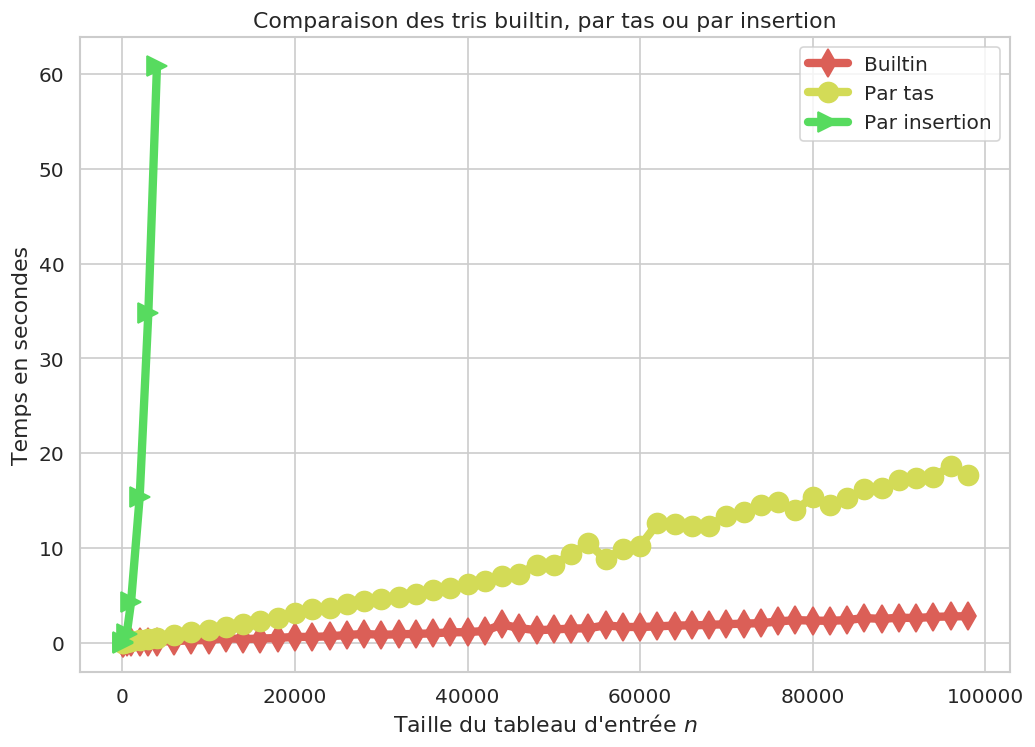

In [232]:
plt.figure()
plt.xlabel("Taille du tableau d'entrée $n$")
plt.ylabel("Temps en secondes")
plt.title("Comparaison des tris builtin, par tas ou par insertion")
plt.plot(values_n, times_sorted, "d-", label="Builtin", lw=5, ms=12)
plt.plot(values_n, times_heapSort, "o-", label="Par tas", lw=5, ms=12)
plt.plot(small_values_n, times_insertionSort, ">-", label="Par insertion", lw=5, ms=12)
plt.legend()
plt.show()

Attention : Trier des nombres tout petit peut être effectué en temps linéaire (*bin sort*) :

In [136]:
%timeit sorted(random_array_of_int(max_int=10, length=100))
%timeit sorted(random_array_of_int(max_int=10, length=1000))
%timeit sorted(random_array_of_int(max_int=10, length=10000))

133 µs ± 9.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.29 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.25 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.3 ms ± 912 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [148]:
%timeit sorted(random_array_of_int(max_int=1000, length=100))
%timeit sorted(random_array_of_int(max_int=1000, length=1000))
%timeit sorted(random_array_of_int(max_int=1000, length=10000))

142 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.32 ms ± 74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.8 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
